# Import fNIRS data into HyPyP

Authors         : Ghazaleh Ranjbaran, Caitriona Douglas, Guillaume Dumas

Date            : 2022-05-21

### Loading useful libraries

In [12]:
# Interactive plotting
%matplotlib qt

import numpy as np
import mne
import os

### Loading fNIRS tools 

In [13]:
from hypyp.fnirs_tools import load_fnirs
from hypyp.fnirs_tools import make_fnirs_montage
from hypyp.fnirs_tools import fnirs_epoch
from hypyp.fnirs_tools import fnirs_montage_ui

### Step 1:  Setting the path:
data is in .snirf format without explicit montage file (from https://osf.io/75fet/ )

In [14]:
path_1 = "../data/FNIRS/DCARE_02_sub1.snirf"

path_2 = "../data/FNIRS/DCARE_02_sub2.snirf"

### Step 2:  Loading fNIRS Data

HyPyP utelizes MNE python library to load the data, currently 4 types of data can be employed:
<ul>
<li>SNIRF (.snirf)</li>
<br>
<li>NIRx (directory or hdr)
 <br>
 Note: MNE-Python only supports NIRx files recorded with NIRStar version 15.0 and above and Aurora version 2021 and above. MNE-Python supports reading data from NIRScout and NIRSport devices</li>
 <br>
<li>Hitachi (.csv)</li>
<br>
<li>BOXY (.txt)</li>
</ul>
 
More information at <a href="https://mne.tools/stable/auto_tutorials/io/30_reading_fnirs_data.html">this link</a>

In [15]:
fnirs_participant_1 = load_fnirs(path_1, path_2, attr=None, preload=False, verbose=None)[0]
fnirs_participant_2 = load_fnirs(path_1, path_2, attr=None, preload=False, verbose=None)[1]

### Step 3:  Creating a Compatible Montage

MNE-Python provides methods to load standard sensor configurations (montages) from some vendors:

'artinis-octamon' : Artinis OctaMon fNIRS (8 sources, 2 detectors)

'artinis-brite23' : Artinis Brite23 fNIRS (11 sources, 7 detectors)
<br>
<br>
1. If the montage is compatible with the above format, we can pass the vendor's name as a string to 'mne_standard' argument:
<br>
<br>
Example: location = make_fnirs_montage(mne_standard:str = 'artinis-octamon')
<br>
<br>
Note: In MNE-Python the naming of channels MUST follow the structure S#_D# where # is replaced by the appropriate source and detector numbers and type is either hbo, hbr or the wavelength. 
<br>
<br>
2. If the montage is not compatible with one of the built-in supported montages mentioned above and is amonge <a href="https://mne.tools/stable/generated/mne.channels.read_custom_montage.html#mne.channels.read_custom_montage">file formats</a>, we shall pass the file directoy to the 'prob_directory' argument, and set 'create_montage' to False.
<br>
<br>
Example: location = make_fnirs_montage(prob_directory = 'locations.xyz', create_montage = False)
<br>
<br>
3. In other cases the below function helps with building montage compatible with MNE python 

Or we can create the inputs list manually and use it in the same way as above 

In [16]:
#Sources ' labels: S#
source_labels = ['S1','S2','S3','S4','S5','S6','S7','S8']
#Sources ' labels: D#
detector_labels = ['D1','D2','D3','D4','D5','D6','D7','D8']
#directory of the probeInfo.mat file
prob_mat_file = '../data/FNIRS/MCARE_01_probeInfo.mat'
#3D Coordination of the tip of the nose: [x, y, z] in mm
Nz_coord = [12.62, 17.33, 16.74]
#3D Coordination of the right preauricular: [x, y, z] in mm
RPA = [21.0121020904262, 15.9632489747085, 17.2796094659563]
#3D Coordination of the left preauricular: [x, y, z] in mm
LPA = [4.55522116441745, 14.6744377188919, 18.3544292678269]
#Head size in mm
head_size = 0.16

location = make_fnirs_montage(source_labels, detector_labels, prob_mat_file,
                              Nz_coord, RPA, LPA, head_size)

### Step 4: Create Epoch Objects: 
HyPyP is compatible with MNE.epoch data type; we use values compatible with our fnirs sample for each arguments, in other cases arguments can be changed based on the information provided in <a href="https://mne.tools/stable/generated/mne.Epochs">this link</a>

In [17]:
fnirs_epo1 = fnirs_epoch(fnirs_participant_1, fnirs_participant_2 ,tmin = -0.1, tmax = 1,
                    baseline = (None, 0), preload = True, event_repeated = 'merge')[0]
                    
fnirs_epo2 = fnirs_epoch(fnirs_participant_1, fnirs_participant_2, tmin = -0.1, tmax = 1,
                    baseline = (None, 0), preload = True, event_repeated = 'merge')[1]

fnirs_epo1 and fnirs_epo2 are now compatible with tools provided by HyPyP (for visualization and statictical analyses check [this](https://github.com/ppsp-team/HyPyP/blob/master/tutorial/getting_started.ipynb) tutorial)

### Step 5: Plotting the Data 

In [18]:
fnirs_epo1.set_montage(location)
fnirs_epo2.set_montage(location)

Number of events,16
Events,1: 22: 23: 34: 85: 1
Time range,-0.128 – 1.024 sec
Baseline,-0.128 – 0.000 sec


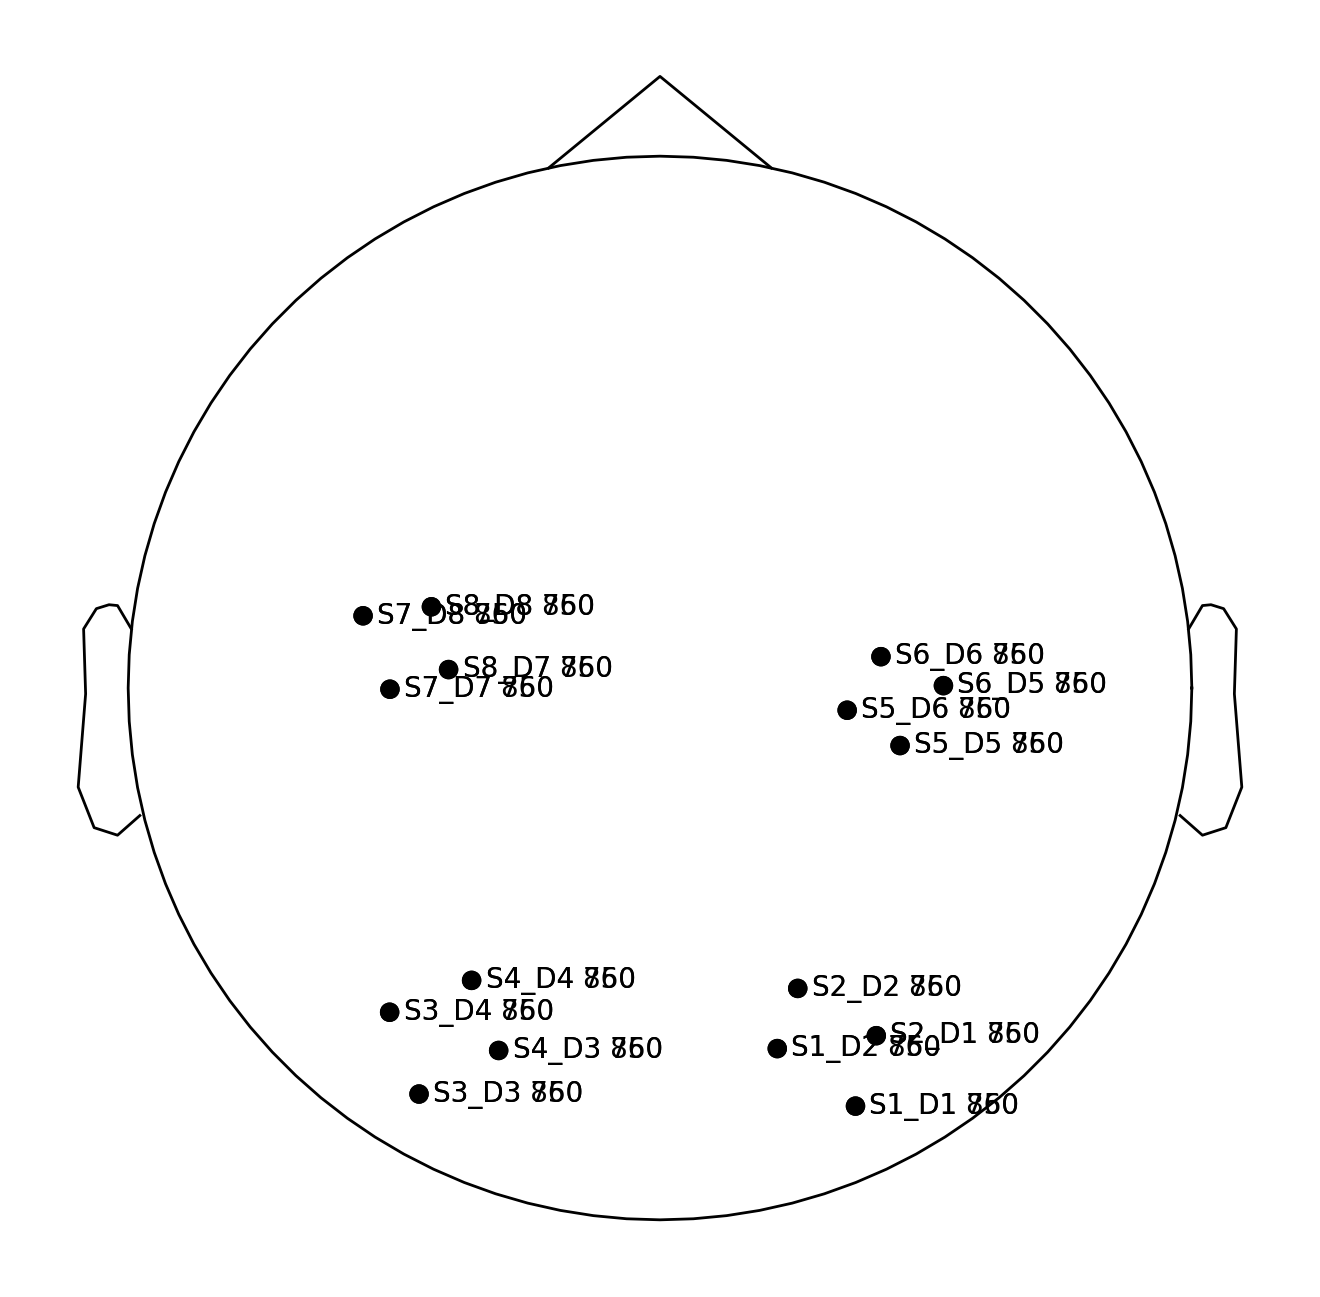

In [19]:
fnirs_epo1.plot_sensors(show_names=True)

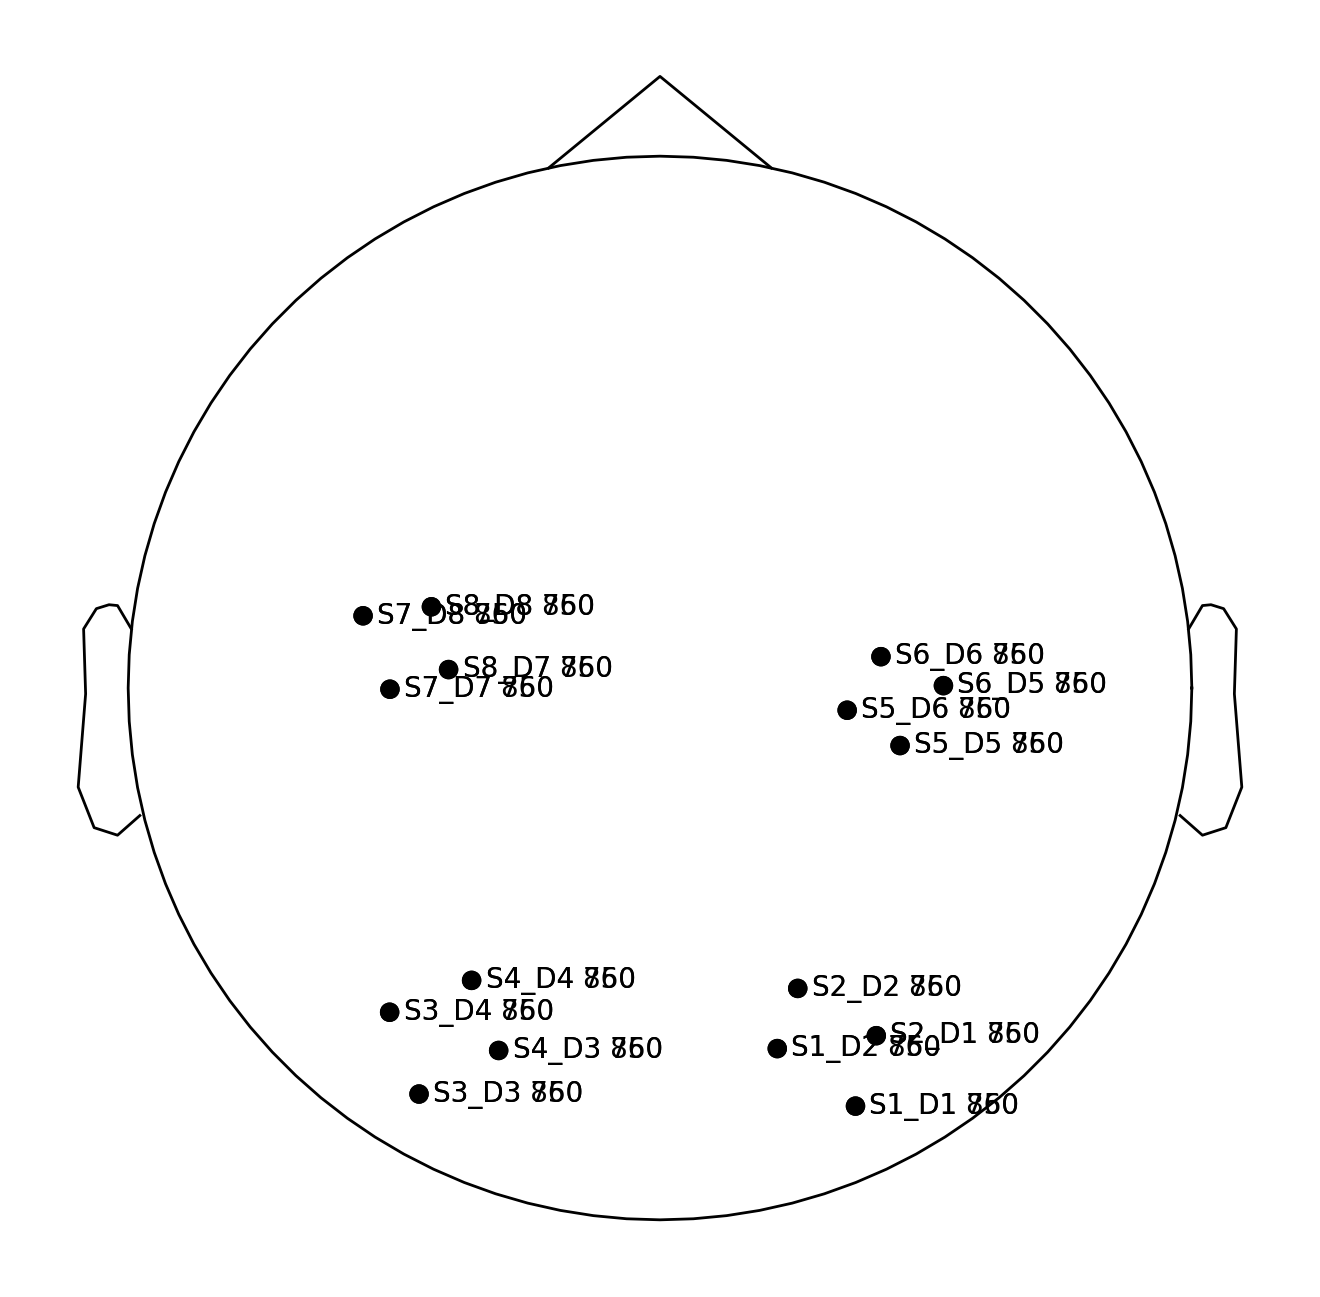

In [20]:
fnirs_epo2.plot_sensors(show_names=True)

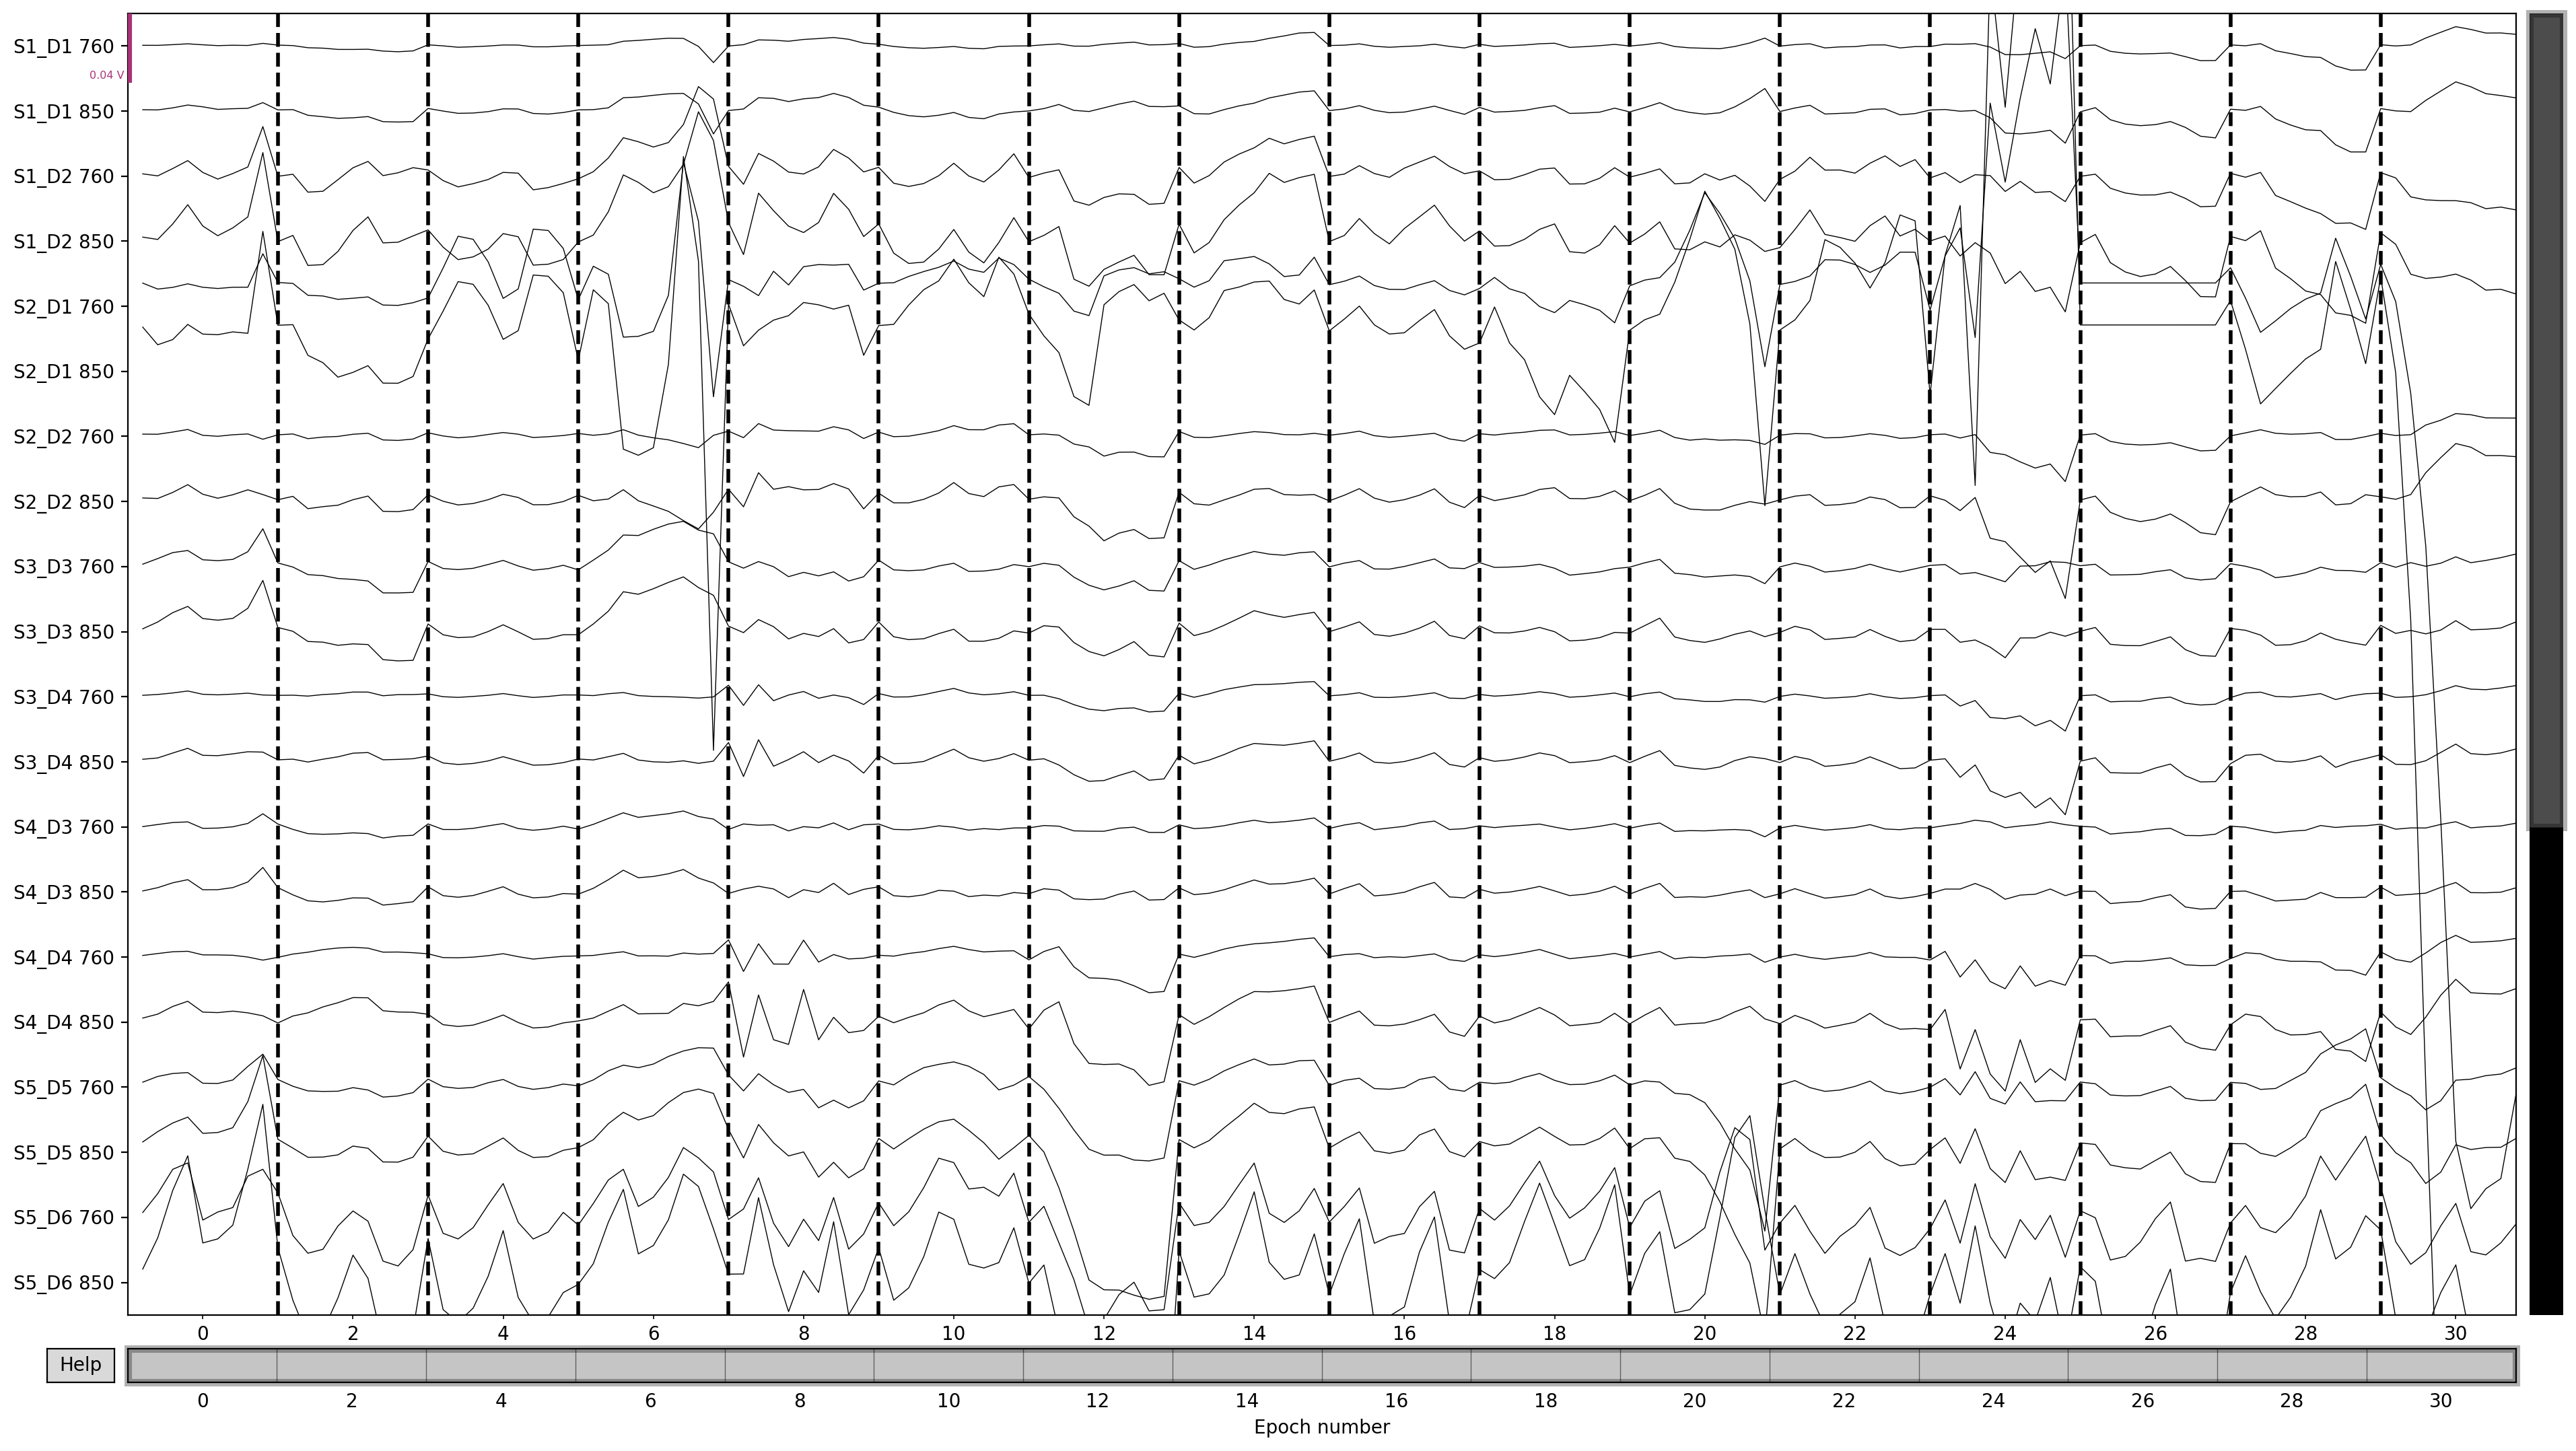

In [21]:
fnirs_epo1.plot()

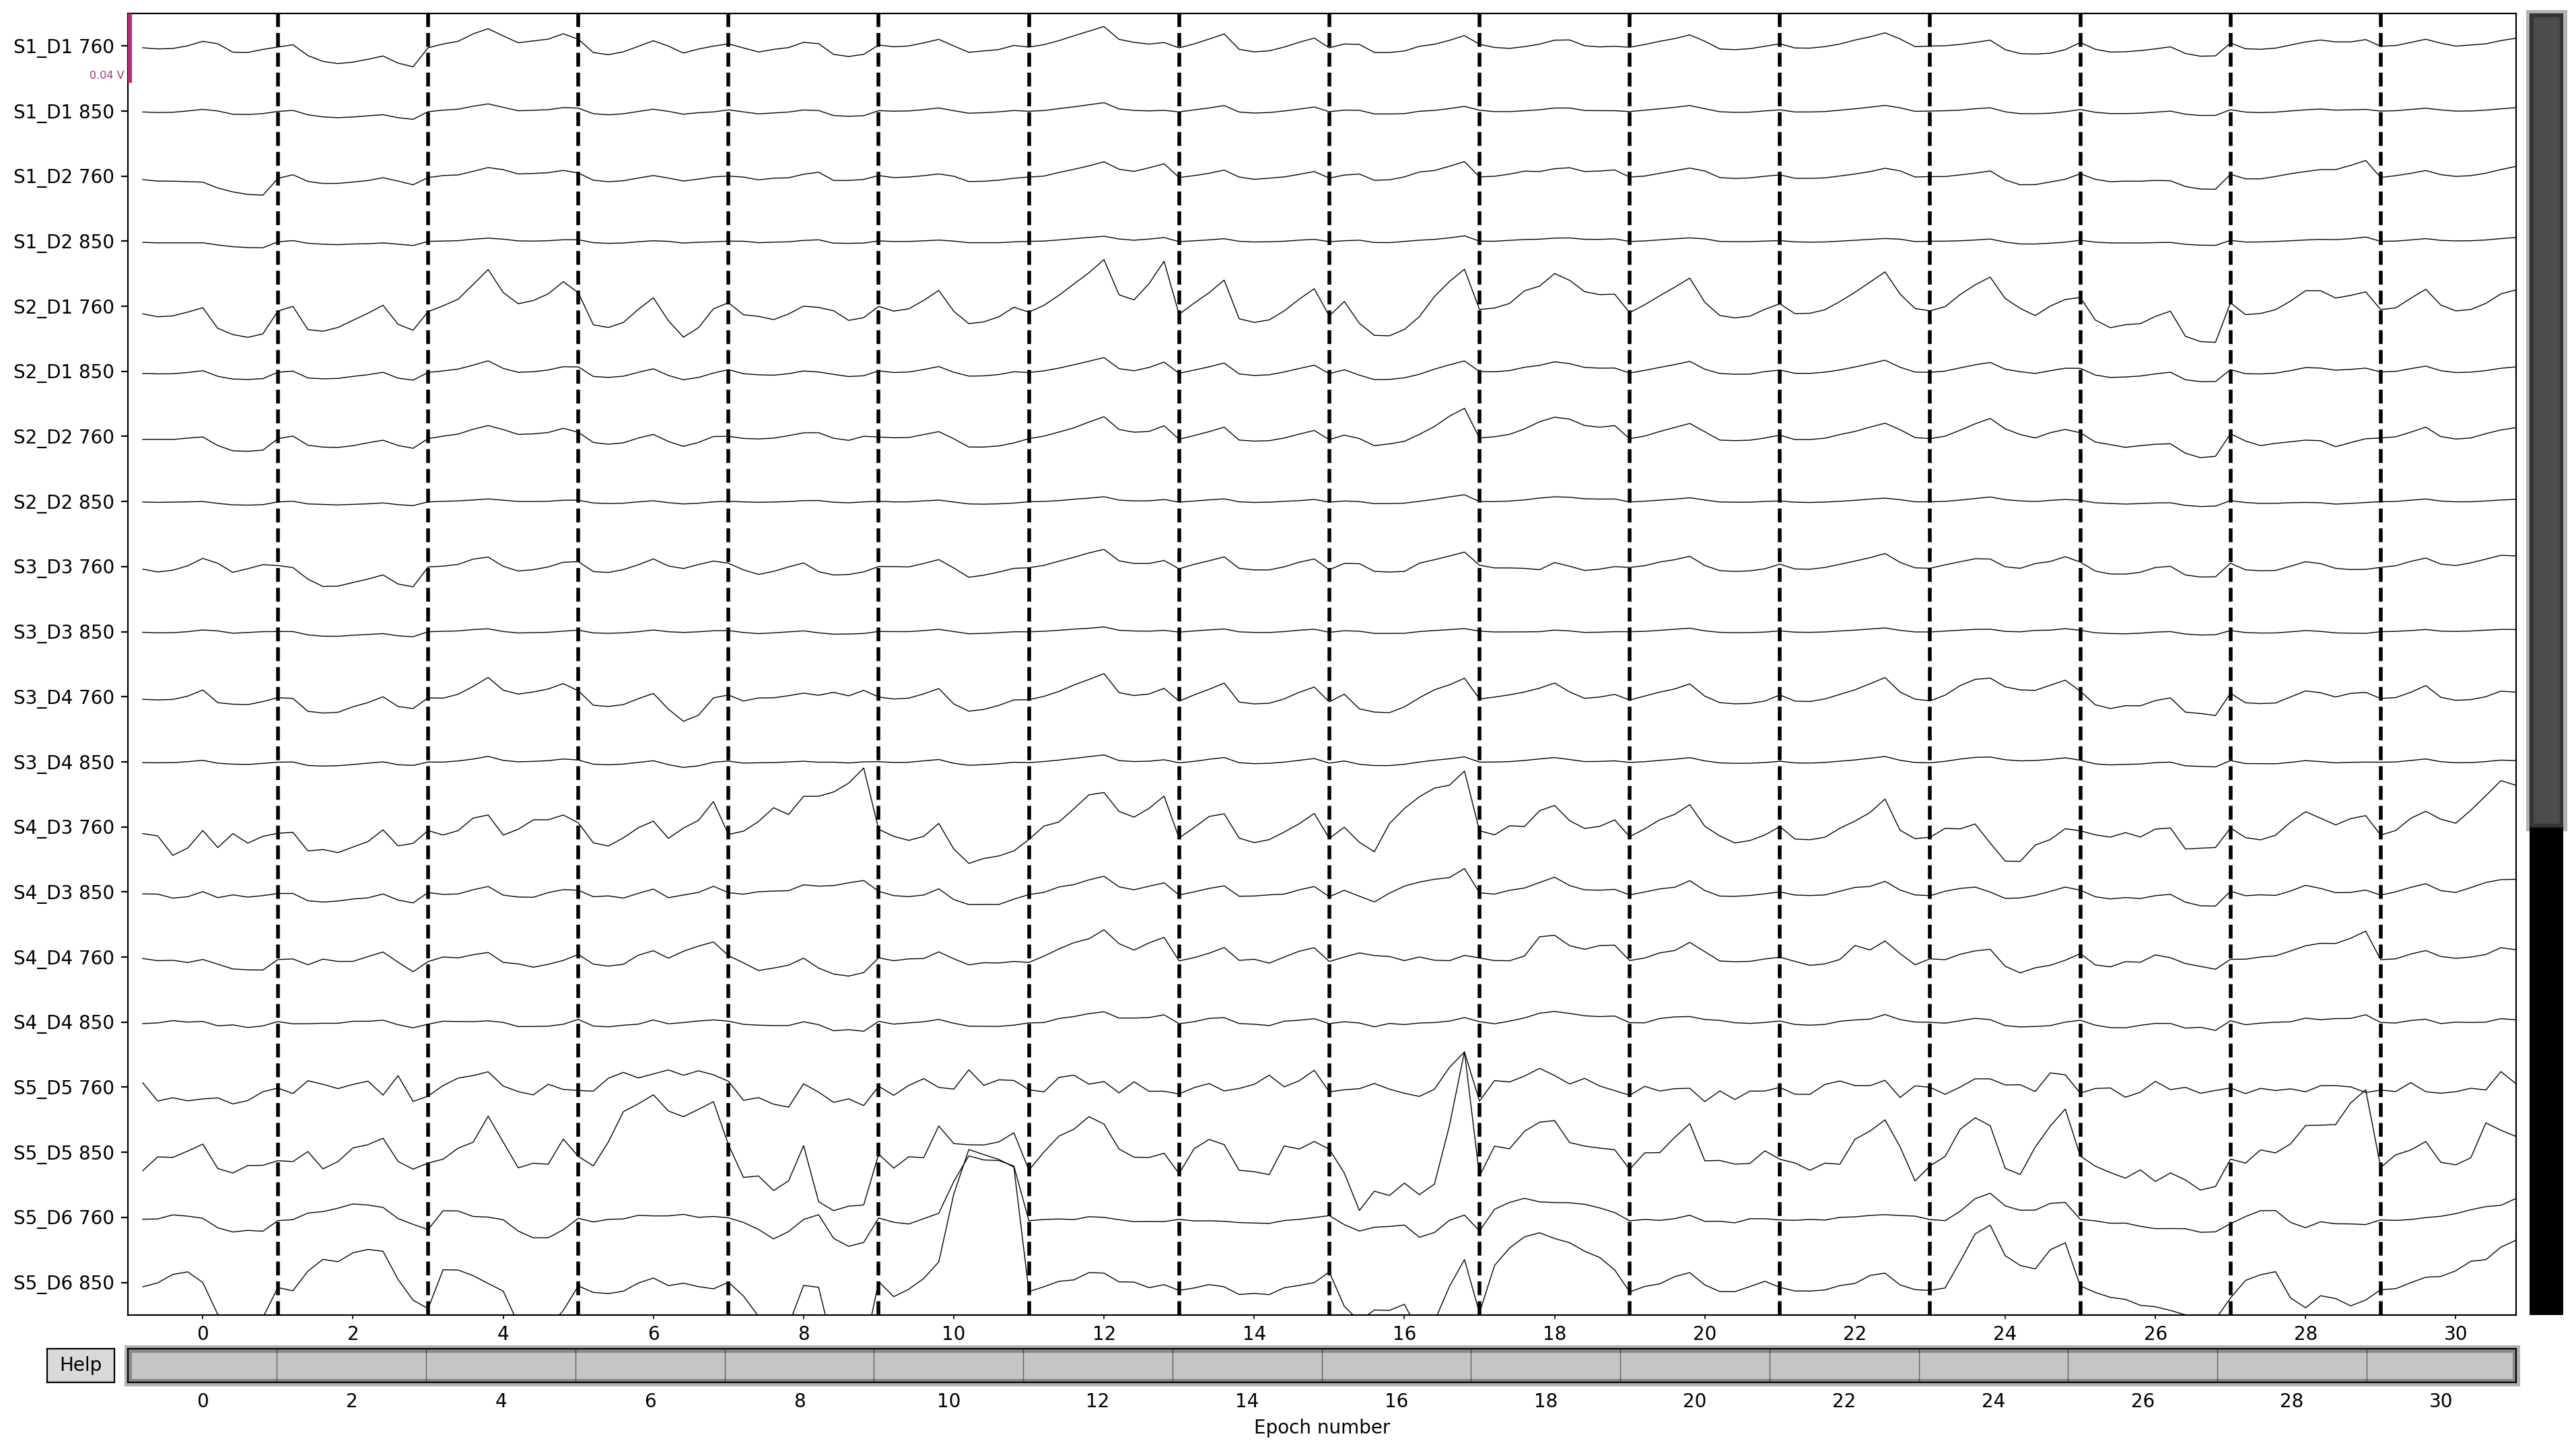

In [22]:
fnirs_epo2.plot()